In [62]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

The uploaded .csv file is read using pandas library and stored in the variable 'dt' and 5 rows of data from the top and 10 from bottom is displayed.

In [63]:
dt = pd.read_csv('supervised.csv')
dt.head()

,ArticleId,Description,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [64]:
dt.tail(10)

,ArticleId,Description,Category
1480,1124,qantas sees profits fly to record australian a...,business
1481,950,liverpool pledge to keep gerrard liverpool chi...,sport
1482,1880,file-swappers ready new network legal attacks ...,tech
1483,1904,beastie boys win sampling battle us rappers be...,entertainment
1484,1774,hyundai to build new india plant south korea s...,business
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech
1489,538,santy worm makes unwelcome visit thousands of ...,tech


The below code is to display all the unique elements in the Category column

In [65]:
dt['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

This shows the number of rows and columns in the dt variable (uploaded .csv file)

In [66]:
dt.shape

(1490, 3)

The below code is to check if there are any null elements in the file. "True" is returned if a null element is present in a column. Else, "False is displayed".

In [67]:
dt.isnull().any()

ArticleId      False
Description    False
Category       False
dtype: bool

Seaborn library is used to call the countplot function. Here, the number of articles for each category is displayed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


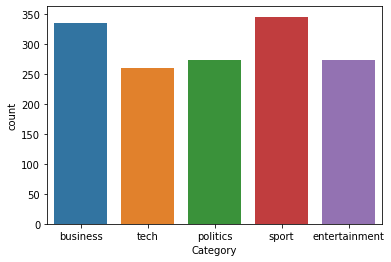

In [68]:
sns.countplot(dt['Category'])

A new column is added to the 'dt' called length which is equal to the number of words in the description cell of the respective column.

In [69]:
dt['length'] = dt['Description'].str.len()
dt['length']

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: length, Length: 1490, dtype: int64

The displot is plotted using seaborn library. It shows the average number of word length used in the data file.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution')

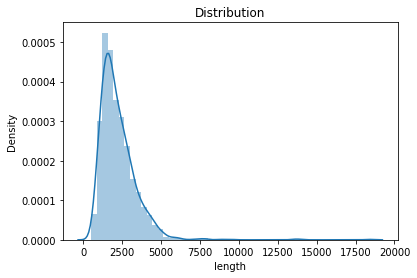

In [70]:
sns.distplot(dt['length']).set_title('Distribution')

A wordcloud function is defined and using WordCloud library, the following commands are given to plot a figure.

In [71]:
def wordcloud(words):
  wc = WordCloud(width = 1000, height=600, max_font_size=120).generate(words)
  plt.figure(figsize=(10,7))
  plt.imshow(wc,interpolation="bilinear")
  plt.axis("off")
  plt.show()

The following code focuses on the Category column of "business". The description in each of this category is split into words and given it to the wordcloud function. Finnally, using the wordcloud function, the plot is drawn.

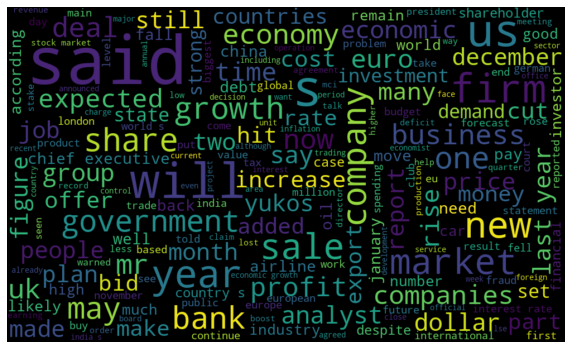

In [72]:
subset = dt[dt['Category']=="business"]
text = subset.Description.values
words = ' '.join(text)
wordcloud(words)

The following code focuses on the Category column of "tech". The description in each of this category is split into words and given it to the wordcloud function. Finnally, using the wordcloud function, the plot is drawn.

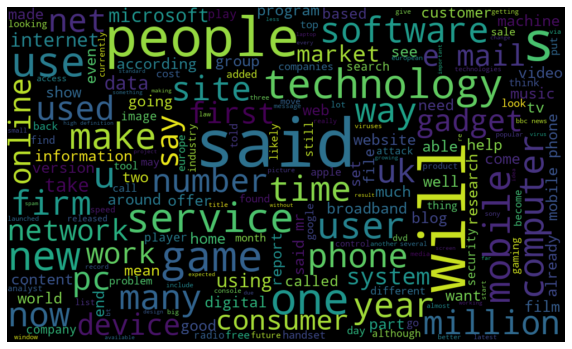

In [73]:
subset = dt[dt['Category']=="tech"]
text = subset.Description.values
words = ' '.join(text)
wordcloud(words)

The following code focuses on the Category column of "politics". The description in each of this category is split into words and given it to the wordcloud function. Finnally, using the wordcloud function, the plot is drawn.

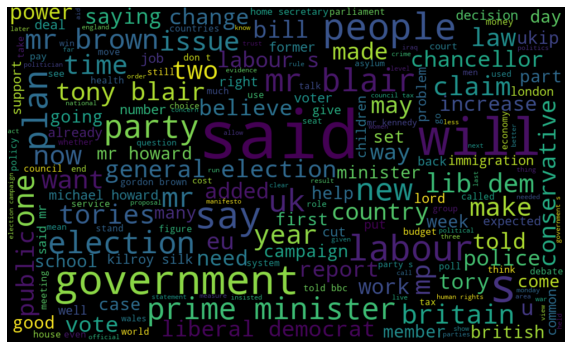

In [74]:
subset = dt[dt['Category']=='politics']
text = subset.Description.values
words = ' '.join(text)
wordcloud(words)

The following code focuses on the Category column of "entertainment". The description in each of this category is split into words and given it to the wordcloud function. Finnally, using the wordcloud function, the plot is drawn.

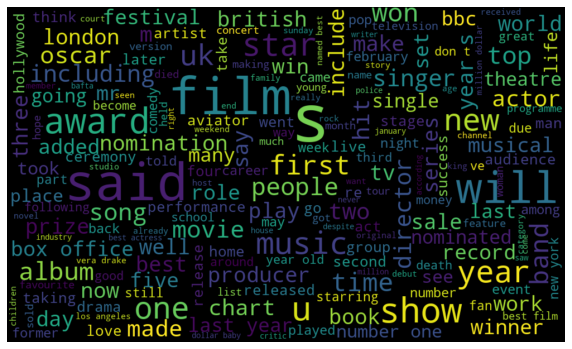

In [75]:
subset = dt[dt['Category']=="entertainment"]
text = subset.Description.values
words = ' '.join(text)
wordcloud(words)

The following code focuses on the Category column of "sport". The description in each of this category is split into words and given it to the wordcloud function. Finnally, using the wordcloud function, the plot is drawn.

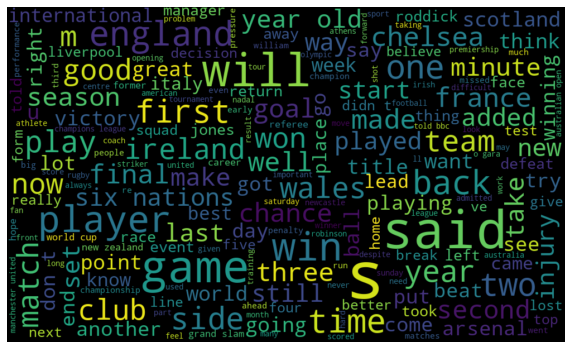

In [76]:
subset = dt[dt['Category']=="sport"]
text = subset.Description.values
words = ' '.join(text)
wordcloud(words)

nltk is "The natural language toolkit". This library is used in python for applications of NLP.

'stopwords' is used to remove the stopwords like and, a, the etc.. which does not contribute to the context/ meaning in the text.

'punkt' is a tokenizer which divides the given text into a list of sentences. (very useful when dealing with large paragraphs)

In [77]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

The tokenize function is used to breakdown the given text into small chunkz/words. In the process, the stopwords, additional spaces etc... are removed. Finally, the words are joined together again and returned by the function.

In [78]:
def tokenize(text):
  text = text.lower().replace('\n',' ').replace('\r',' ').strip()
  text = re.sub(' +',' ',text)
  text = re.sub(r'[^\w\s]','',text)
  StopWords = set(stopwords.words('english'))
  wordToken = word_tokenize(text)
  
  filteredSentence = [] 
  for i in wordToken: 
     if i not in StopWords: 
        filteredSentence.append(i) 
    
  text = " ".join(filteredSentence)
  return text

A new column 'Parsed' is added and the contents of 'Description' is tokenized using  tokenize function and stored in 'Parsed' column. The first 5 rows are displayed below.

Now, using the sklearn preprocessing library, we label encode the given text. That is, a new column is added where the unique elements of Category column is numbered. (For example, "business" as "0" and so on.)

In [79]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
dt['Category_target']= label_encoder.fit_transform(dt['Category']) 
dt.head(10)

,ArticleId,Description,Category,length,Category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,0
1,154,german business confidence slides german busin...,business,2016,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,0
5,1582,howard truanted to play snooker conservative...,politics,1588,2
6,651,wales silent on grand slam talk rhys williams ...,sport,1988,3
7,1797,french honour for director parker british film...,entertainment,1342,1
8,2034,car giant hit by mercedes slump a slump in pro...,business,2609,0
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,1368,1


The data is stored in a new file named as 'processed.csv'

In [80]:
dt.to_csv('processed.csv')

In [81]:
dt['Parsed'] = dt['Description'].apply(tokenize)
dt.head()

,ArticleId,Description,Category,length,Category_target,Parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,0,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,0,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,0,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,4,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,0,enron bosses 168m payout eighteen former enron...


The given datset is split into training and test dataset using the sklearn library.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(dt['Parsed'], 
                                                    dt['Category_target'], 
                                                    test_size=0.2, 
                                                    random_state=8)


In [83]:
X_test

307     blair congratulates bush win tony blair said l...
517     moya emotional davis cup win carlos moya descr...
1130    blair said would stand tony blair promised gor...
629     digital guru floats sub100 pc nicholas negropo...
548     sainsbury labour election gift science ministe...
                              ...                        
848     kennedy looks election gains may know quite de...
336     mcconnell details scots wave toll least three ...
149     arthur hailey king bestsellers novelist arthur...
1107    millions miss net 2025 40 uk population still ...
56      borussia dortmund near bust german football cl...
Name: Parsed, Length: 298, dtype: object

The below code is to set the parameters. The ngrams_range is to maintain the length of the data. The (1,2) refers to a maximum length of 2 and a minimum length of 1. min_df is to remove the terms that do not appear frequently. Its the opposite for max_df. 

In [84]:
#These are hyper parameters, which are defined during the compile time 
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

Now, the parsed/preprocessed text has to be vectorized in numerical form for the models to take as input. Here, we use TF-IDF vectorizer with the help of its sklearn library to do the process. The parameters are mentioned as below. The training and testing 'Parsed' data are converted into numerical vectors and stored as features_train and features_test.

In [85]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)



[[0.0894863  0.         0.         ... 0.         0.0463896  0.06766975]
 [0.05501963 0.         0.07169191 ... 0.03972773 0.08176571 0.07044504]
 [0.         0.         0.         ... 0.11423937 0.13886684 0.        ]
 ...
 [0.13256211 0.         0.17273162 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.04393444 0.         0.        ]]
(298, 300)


Now, the vectorized input is given to logistic regression model and the accuracy is checked. Initially, the model is fit using the features vector in training data. Then, the model predicts output. The predicted output is compared and the accuracy is noted.

In [86]:
model = LogisticRegression()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)

print()
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))



Accuracy:  0.9429530201342282
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



Now, the vectorized input is given to Naive Bayes model and the accuracy is checked. Initially, the model is fit using the features vector in training data. Then, the model predicts output. The predicted output is compared and the accuracy is noted.

In [87]:
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)

print()
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))


Accuracy:  0.8825503355704698
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        76
           1       0.89      0.89      0.89        47
           2       0.90      0.84      0.87        55
           3       0.95      0.95      0.95        65
           4       0.81      0.91      0.85        55

    accuracy                           0.88       298
   macro avg       0.88      0.88      0.88       298
weighted avg       0.88      0.88      0.88       298



Now, the vectorized input is given to Support vector model and the accuracy is checked. Initially, the model is fit using the features vector in training data. Then, the model predicts output. The predicted output is compared and the accuracy is noted.

In [88]:
model = SVC()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)

print()
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))


Accuracy:  0.9496644295302014
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        76
           1       0.98      0.98      0.98        47
           2       0.96      0.89      0.92        55
           3       0.97      0.98      0.98        65
           4       0.92      0.98      0.95        55

    accuracy                           0.95       298
   macro avg       0.95      0.95      0.95       298
weighted avg       0.95      0.95      0.95       298

